# Experiment 13
**Aim**: WAP to implement K-medoids clustering algorithm.

# K-Medoids Clustering Algorithm

The K-Medoids algorithm is a clustering algorithm related to the K-Means algorithm. It is used to group the data points into k clusters. The main difference between the two is that while the K-Means algorithm uses the mean value of a cluster to assign a data point to a cluster, the K-Medoids algorithm uses the median value of a cluster to assign a data point to a cluster.

## Algorithm

The K-Medoids algorithm is as follows:

1. Initialize: randomly select k of the n data points as the medoids
2. Associate each data point to the closest medoid. (Recall that the distance between two points is given by the Manhattan distance for categorical attributes and the Euclidean distance for numeric attributes.)
3. For each medoid m
    * For each non-medoid data point o
        * Swap m and o and compute the total cost of the configuration
4. Select the configuration with the lowest cost.
5. repeat steps 2 to 4 until there is no change in the medoid.


In [42]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [43]:
# Generate synthetic data with blobs
X, y = make_blobs(n_samples=200, centers=3, random_state=42)

In [ ]:
# Define the number of clusters (k)
k = 3

# Use K-means to initialize medoids
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
medoids = kmeans.cluster_centers_

# Maximum iterations
max_iterations = 100

In [69]:
# K-medoids clustering algorithm
for _ in range(max_iterations):
    # Assign each point to the nearest medoid
    distances = np.linalg.norm(X[:, np.newaxis] - medoids, axis=2)
    labels = np.argmin(distances, axis=1)
    
    # Update medoids by selecting the data point that minimizes the total dissimilarity within the cluster
    new_medoids = np.array([X[labels == i][np.argmin(np.sum(distances[labels == i], axis=1))] for i in range(k)])
    
    # Check for convergence
    if np.all(medoids == new_medoids):
        break
    
    medoids = new_medoids

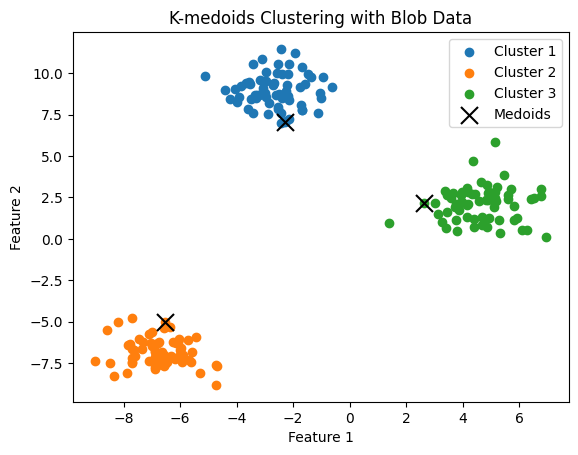

In [70]:
# Visualize the clusters and medoids
for i in range(k):
    cluster_points = X[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i + 1}')

plt.scatter(medoids[:, 0], medoids[:, 1], color='black', marker='x', s=150, label='Medoids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-medoids Clustering with Blob Data')
plt.legend()
plt.show()